# Prediction of gold recovery from ore

The company "Digit" develops solutions for the efficient operation of industrial enterprises. The main task of the project is to create a model that predicts the gold recovery coefficient from gold-bearing ore for the company. To develop the model, the company has provided data on mining and processing parameters. The goal of the model is to optimize production in order to avoid launching a facility with unprofitable characteristics.

## Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import randint
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

from collections import defaultdict
import warnings

In [2]:
train_set = pd.read_csv('/Users/mojseenkodenis/Desktop/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
test_set = pd.read_csv('/Users/mojseenkodenis/Desktop/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
full_set = pd.read_csv('/Users/mojseenkodenis/Desktop/gold_recovery_full_new.csv', index_col='date', parse_dates=True)

In [3]:
train_set.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

In [5]:
test_set.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

In [7]:
full_set.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

Let's check if the efficiency of the enrichment process has been calculated correctly.

In [9]:
def est_output_recovery(c, f, t):
    numerator = c * (f - t)
    divider = f * (c - t)
    
    recovery = (numerator/divider) * 100
    recovery[recovery<0] = np.nan
    recovery[recovery>100] = np.nan
    
    return recovery

In [10]:
c, f, t = full_set['rougher.output.concentrate_au'], full_set['rougher.input.feed_au'], full_set['rougher.output.tail_au']
rec = est_output_recovery(c, f, t)

In [11]:
print(f'Mean: {rec.mean()}')
print(f'MAE: {mean_absolute_error(full_set["rougher.output.recovery"], rec)}')

Mean: 83.3285873508393
MAE: 9.874045668302637e-15


The mean absolute error is much smaller than the calculated mean value, so it can be concluded that the efficiency has been calculated correctly.

In [12]:
#Checking the columns that exist in the training set but not in the test set
missing_columns = list(set(train_set) - set(test_set))

In [13]:
missing_columns

['final.output.tail_ag',
 'rougher.output.recovery',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_sol',
 'final.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'final.output.recovery',
 'secondary_cleaner.output.tail_ag',
 'final.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.concentrate_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.outpu

Among the missing columns, there are values for all stages, but these parameters either belong to product characteristics or to calculated characteristics. These parameters are obtained after the completion of the technological process.

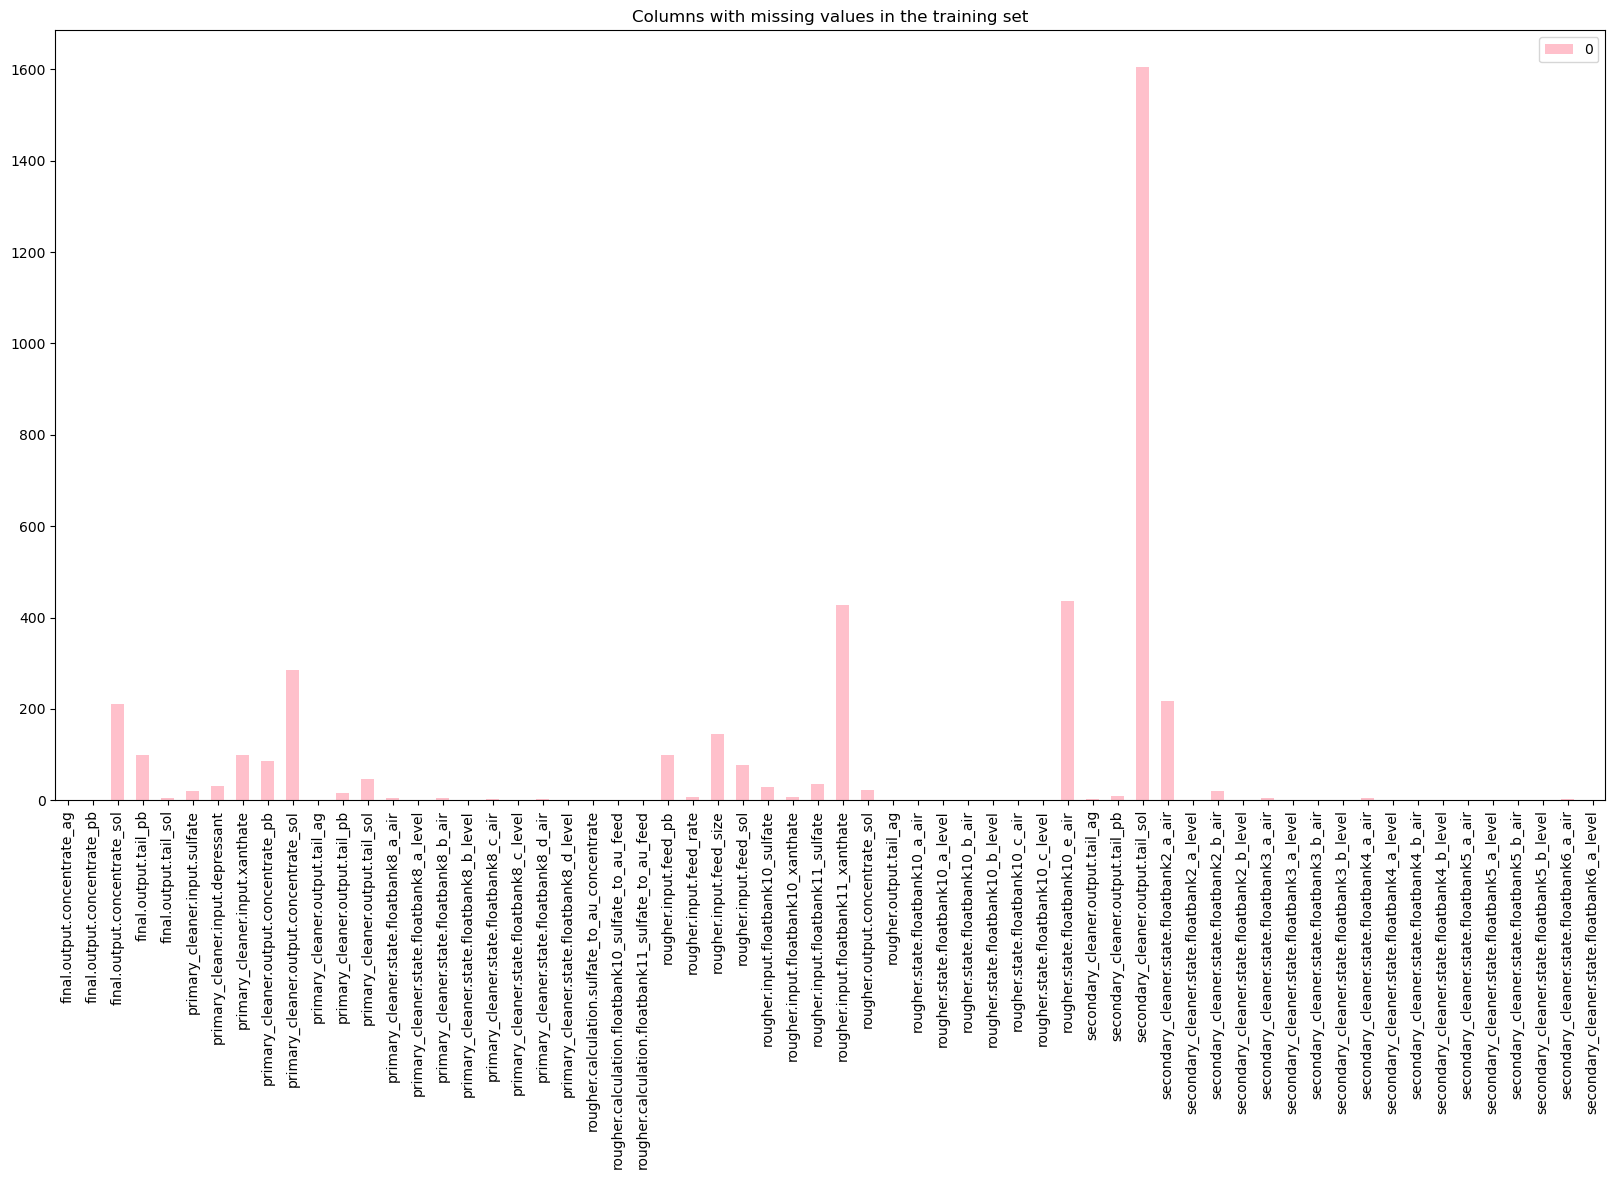

In [14]:
train_na = train_set.isna().sum()
train_na = train_na[train_na > 0]
train_na = pd.DataFrame(train_na)
train_na.plot(kind='bar', figsize=(20,10), color='pink', title='Columns with missing values in the training set');

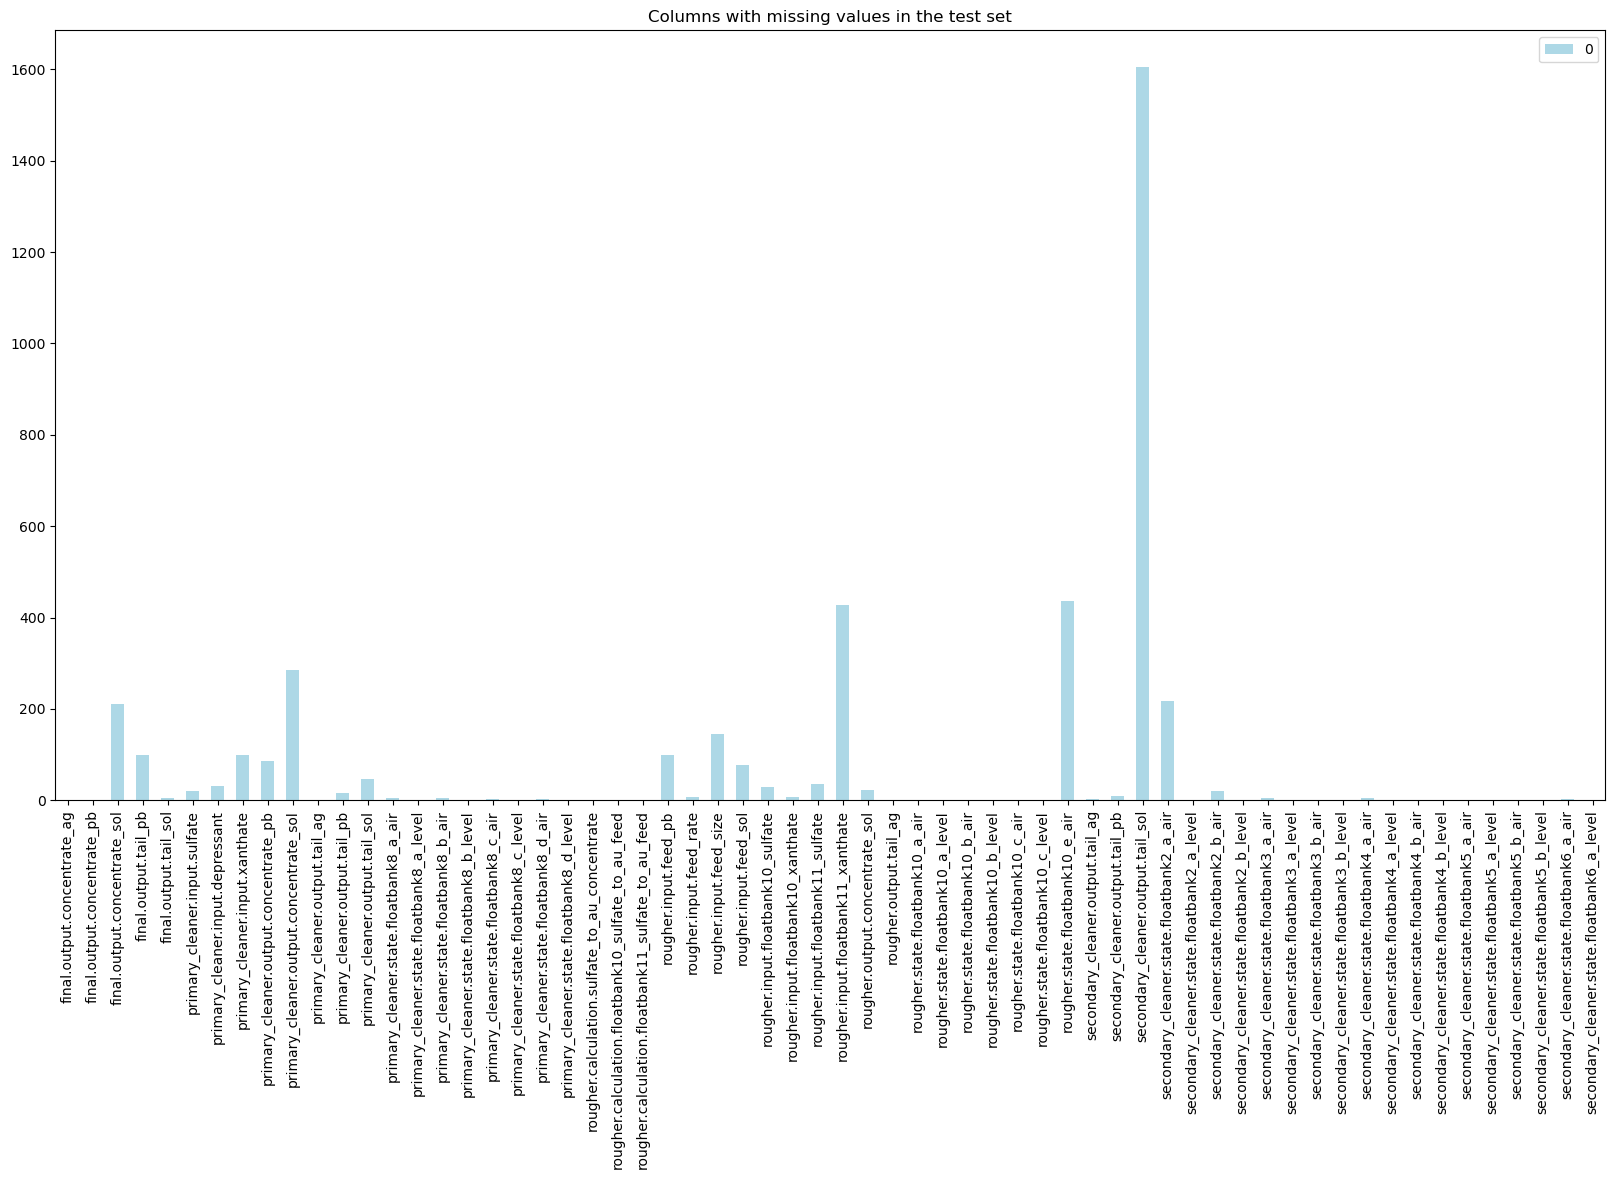

In [15]:
test_na = test_set.isna().sum()
test_na = pd.DataFrame(test_na)
test_na = test_na[test_na > 0]
train_na.plot(kind='bar', figsize=(20,10), color='lightblue', title='Columns with missing values in the test set');

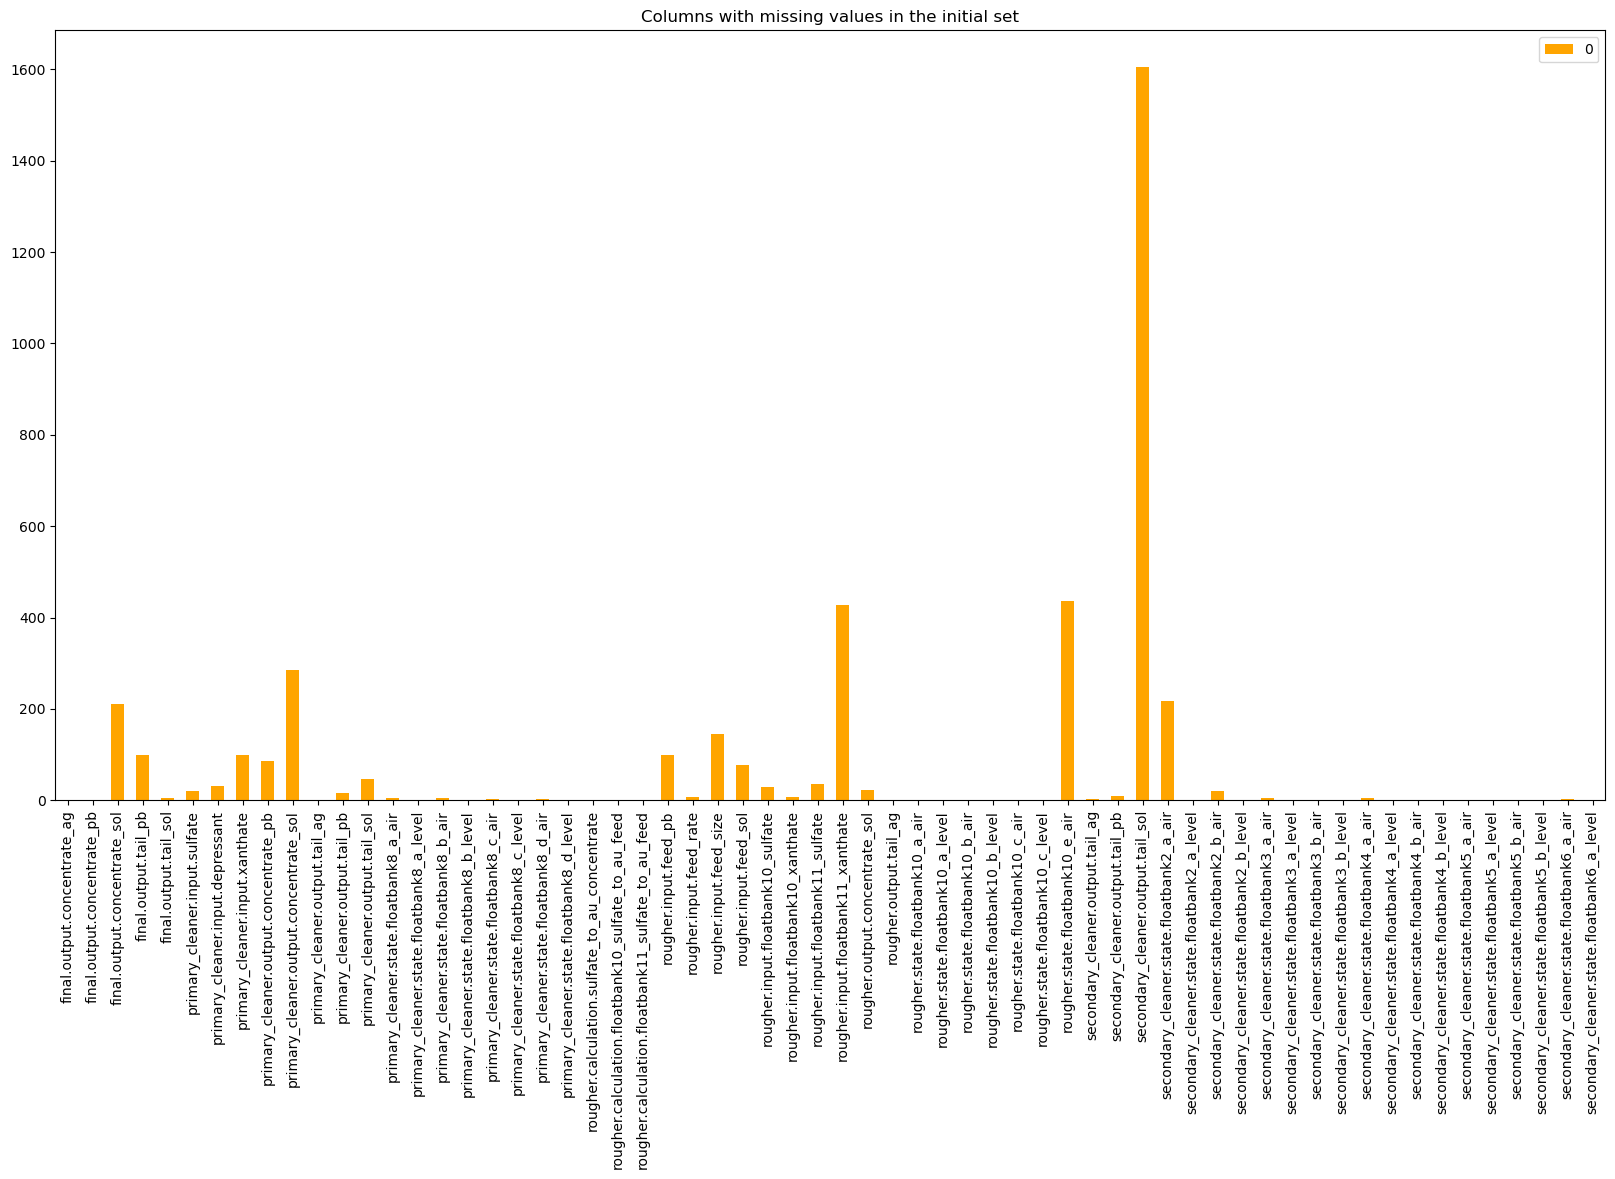

In [16]:
full_na = full_set.isna().sum()
full_na = pd.DataFrame(full_na)
full_na = full_na[full_na > 0]
train_na.plot(kind='bar', figsize=(20,10), color='orange', title='Columns with missing values in the initial set');

In [17]:
datasets = [train_set, test_set, full_set]
names = ['Training set', 'Test set', 'Initial set']

for datasets, names in zip(datasets, names):
    print(names)
    print(f'Size: {datasets.shape}')
    print(f'Duplicates: {datasets.duplicated().sum()}')
    print(f'NA: {datasets.isna().sum().sum()}')
    print(f'NA%: {(datasets.isna().sum().sum()/datasets.shape[0]) * 100}')

Training set
Size: (14149, 86)
Duplicates: 0
NA: 4100
NA%: 28.977312884302776
Test set
Size: (5290, 52)
Duplicates: 0
NA: 90
NA%: 1.7013232514177694
Initial set
Size: (19439, 86)
Duplicates: 0
NA: 4481
NA%: 23.051597304388086


In each dataset, there are missing values. Since the data represents sequential technological processes, we will fill in the gaps with neighboring values.

In [18]:
for data in (train_set, test_set, full_set):
    data.fillna(method='ffill', inplace=True)

Also, in the test dataset, we are missing the target features "rougher.output.recovery" and "final.output.recovery," so we will add them to the test set from the original dataset.

In [19]:
test_set['rougher.output.recovery'] = full_set['rougher.output.recovery'].loc[test_set.index]
test_set['final.output.recovery'] = full_set['final.output.recovery'].loc[test_set.index]

## Data analysis

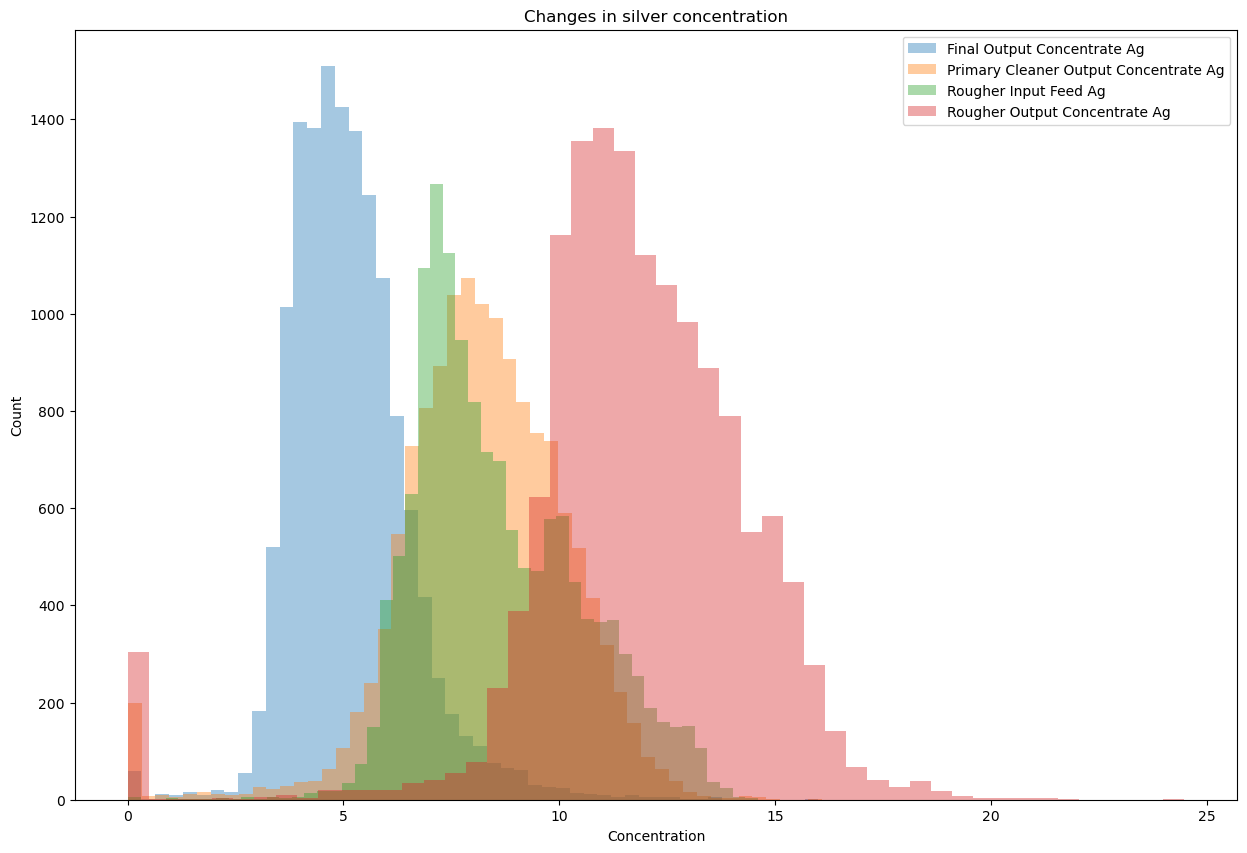

In [20]:
#Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of the purification process.
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 10))
sns.distplot(x=train_set['final.output.concentrate_ag'], label='Final Output Concentrate Ag', kde=False)
sns.distplot(x=train_set['primary_cleaner.output.concentrate_ag'], label='Primary Cleaner Output Concentrate Ag', kde=False)
sns.distplot(x=train_set['rougher.input.feed_ag'], label='Rougher Input Feed Ag', kde=False)
sns.distplot(x=train_set['rougher.output.concentrate_ag'], label='Rougher Output Concentrate Ag', kde=False)
plt.title('Changes in silver concentration')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Count')
plt.show()

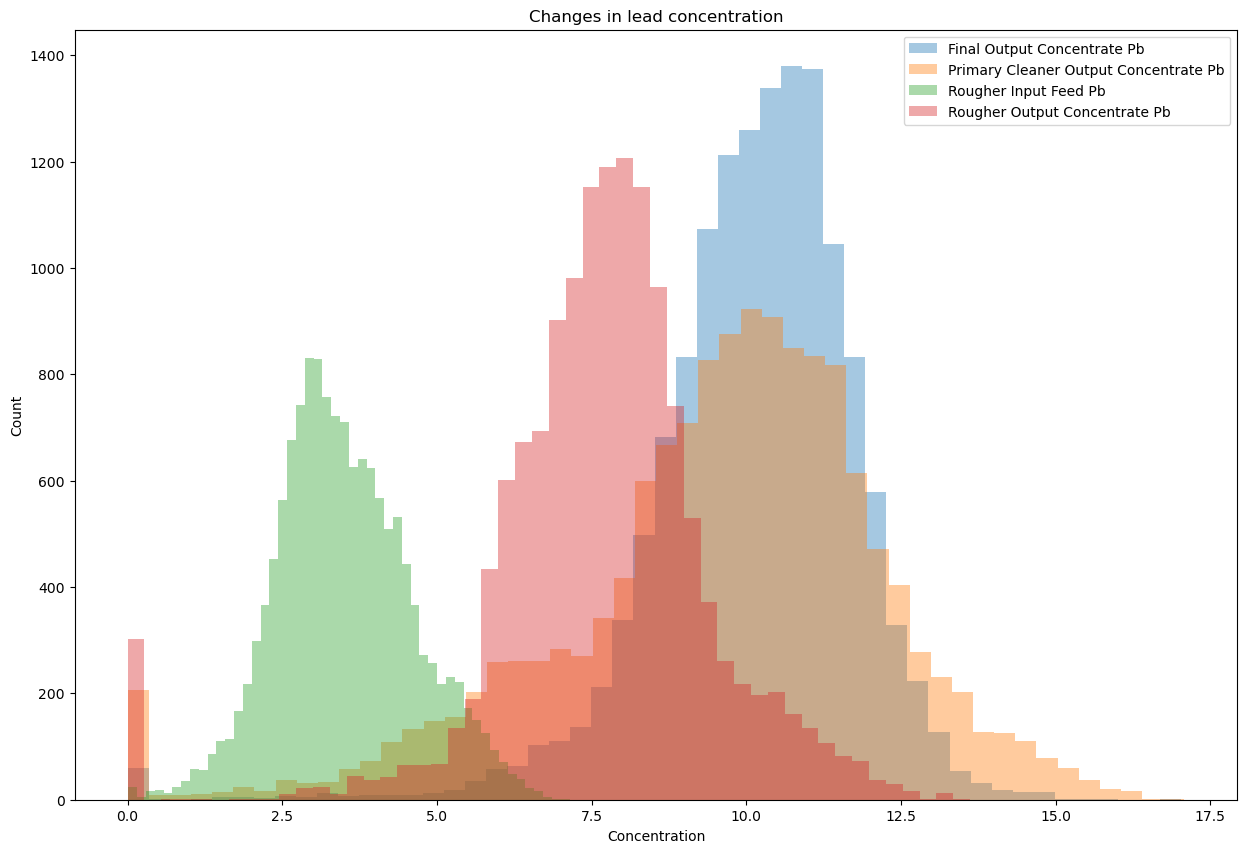

In [21]:
plt.figure(figsize=(15, 10))
sns.distplot(x=train_set['final.output.concentrate_pb'], label='Final Output Concentrate Pb', kde=False)
sns.distplot(x=train_set['primary_cleaner.output.concentrate_pb'], label='Primary Cleaner Output Concentrate Pb', kde=False)
sns.distplot(x=train_set['rougher.input.feed_pb'], label='Rougher Input Feed Pb', kde=False)
sns.distplot(x=train_set['rougher.output.concentrate_pb'], label='Rougher Output Concentrate Pb', kde=False)
plt.title('Changes in lead concentration')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Count')
plt.show()

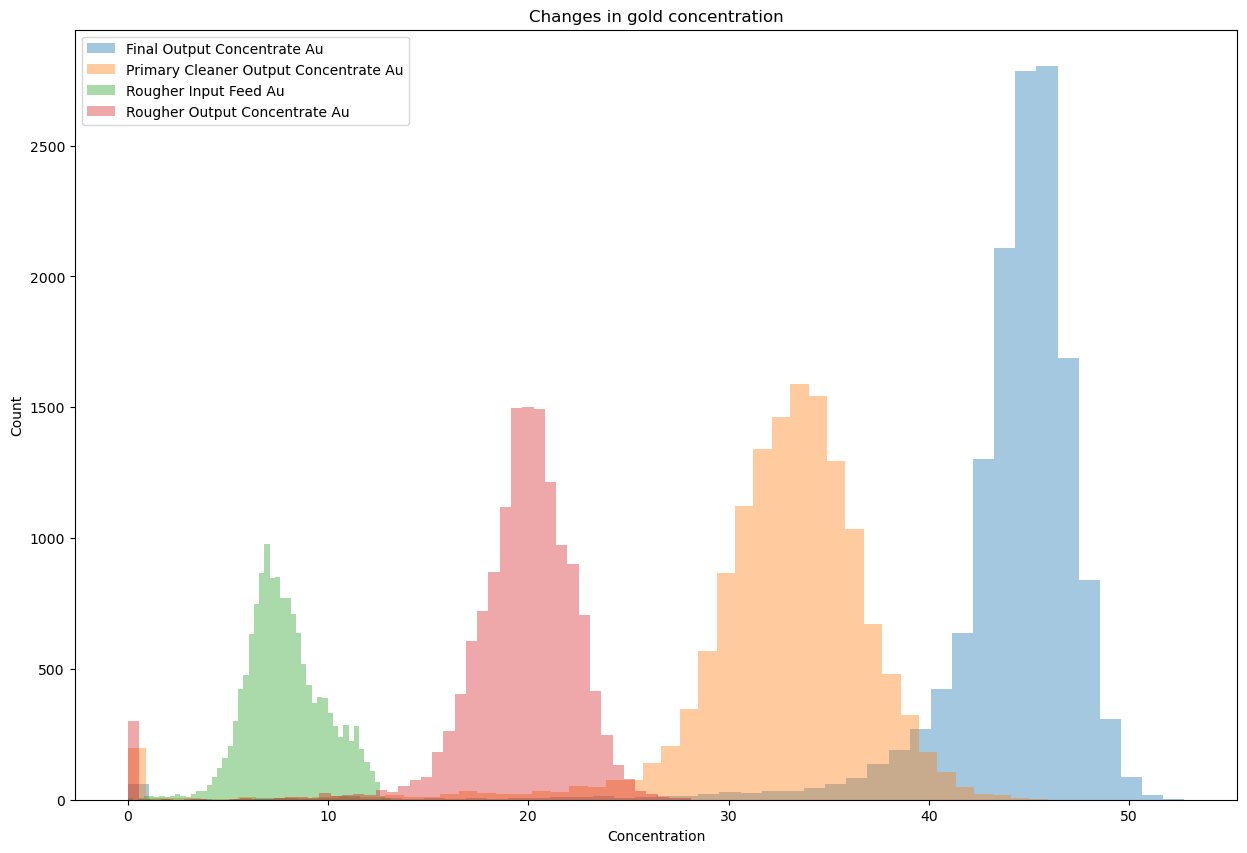

In [22]:
plt.figure(figsize=(15, 10))
sns.distplot(x=train_set['final.output.concentrate_au'], label='Final Output Concentrate Au', kde=False)
sns.distplot(x=train_set['primary_cleaner.output.concentrate_au'], label='Primary Cleaner Output Concentrate Au', kde=False)
sns.distplot(x=train_set['rougher.input.feed_au'], label='Rougher Input Feed Au', kde=False)
sns.distplot(x=train_set['rougher.output.concentrate_au'], label='Rougher Output Concentrate Au', kde=False)
plt.title('Changes in gold concentration')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Count')
plt.show()

In [23]:
all_concentrate = pd.DataFrame()
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'primary_cleaner.output.concentrate_'
fourth = 'final.output.concentrate_'

all_concentrate['raw'] = train_set[[first+'au', first+'ag', first+'pb']].sum(axis=1)
all_concentrate['rough concentrate'] = train_set[[second+'au', second+'ag', second+'pb']].sum(axis=1)
all_concentrate['final concentrate'] = train_set[[third+'au', third+'ag', third+'pb']].sum(axis=1)
all_concentrate['final output concentrate'] = train_set[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

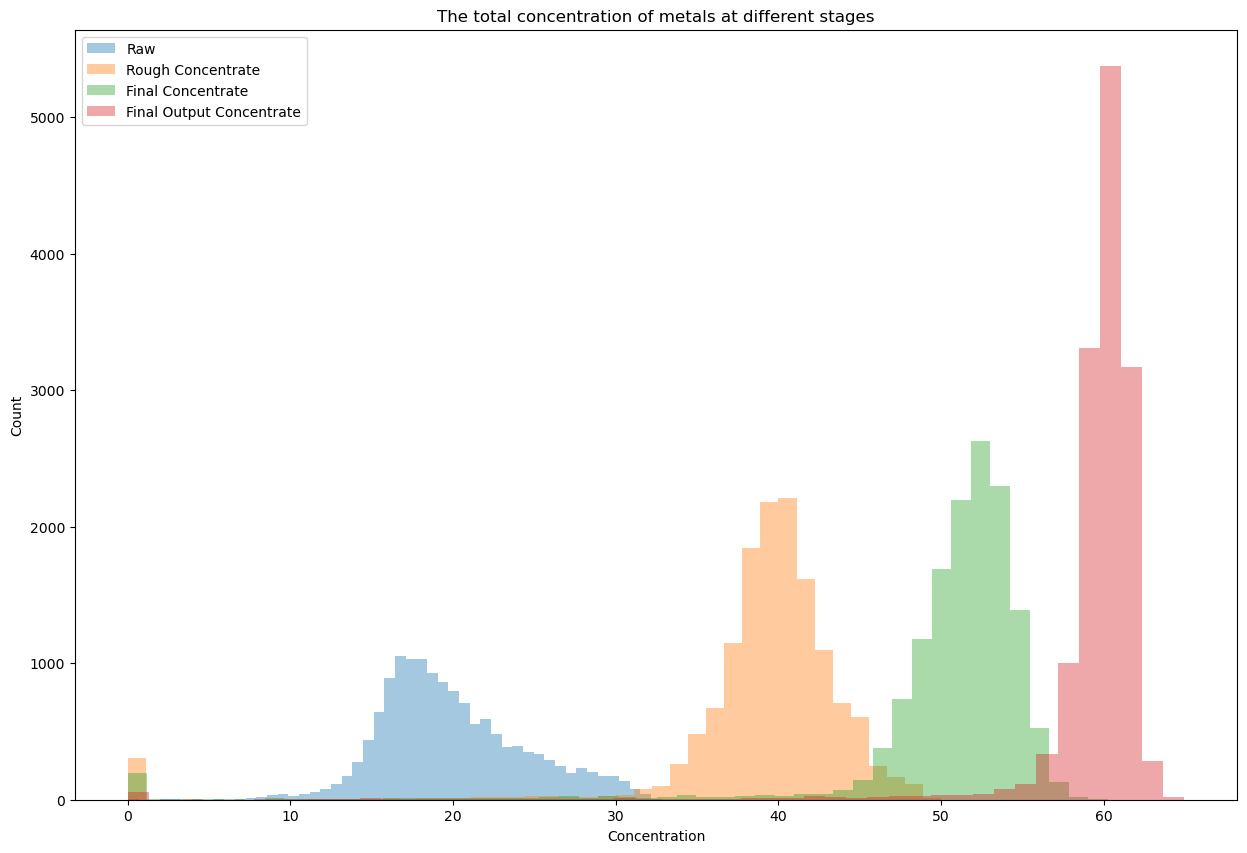

In [24]:
plt.figure(figsize=(15, 10))
sns.distplot(x=all_concentrate['raw'], label='Raw', kde=False)
sns.distplot(x=all_concentrate['rough concentrate'] , label='Rough Concentrate', kde=False)
sns.distplot(x=all_concentrate['final concentrate'], label='Final Concentrate', kde=False)
sns.distplot(x=all_concentrate['final output concentrate'], label='Final Output Concentrate', kde=False)
plt.title('The total concentration of metals at different stages')
plt.legend()
plt.xlabel('Concentration')
plt.ylabel('Count')
plt.show()

On the graph, there are zero values that can be considered anomalies. Let's see how many of them exist at different stages.

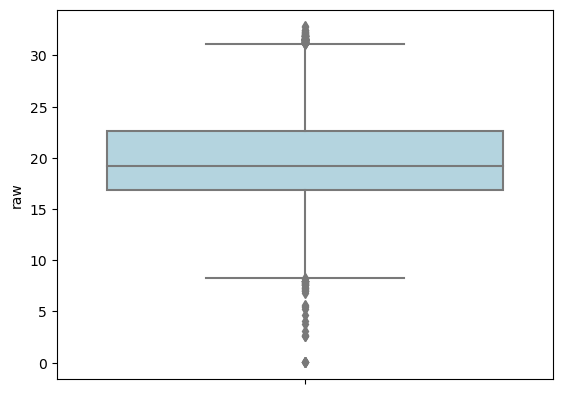

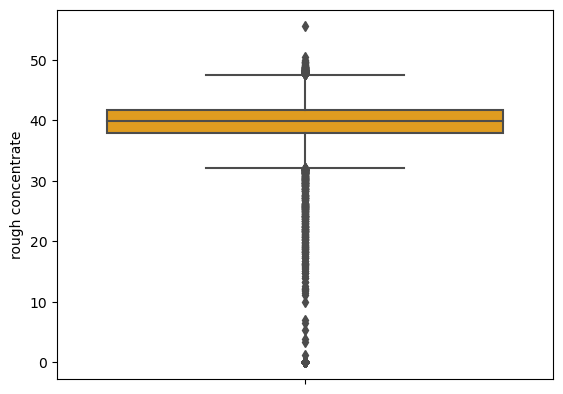

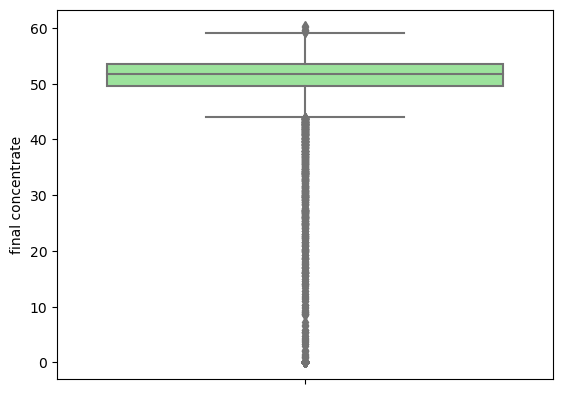

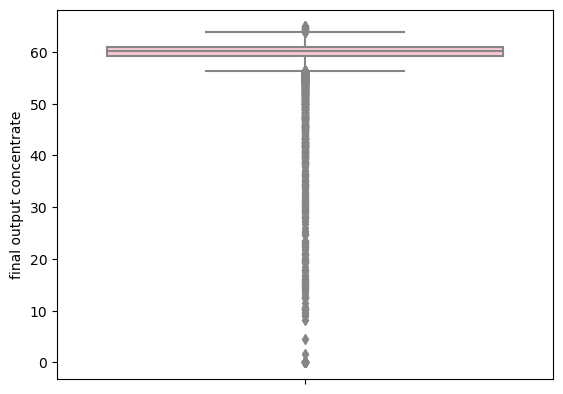

In [25]:
#Taking a look at the distribution and anomalies at each stage.
colors = ['lightblue', 'orange', 'lightgreen', 'pink']
for i, x in enumerate(all_concentrate):
    sns.boxplot(y=all_concentrate[x], palette=[colors[i % len(colors)]])
    plt.show()

In [26]:
columns_with_metall_concentration = [first+'au', first+'ag', first+'pb', second+'au', second+'ag', second+'pb', 
                   third+'au', third+'ag', third+'pb', fourth+'au', fourth+'ag', fourth+'pb']

In [27]:
i = 1
for col in columns_with_metall_concentration:
    zeros_count = len(train_set[train_set[col] == 0])
    print(zeros_count)
    if i % 3 == 0:
        print("------")
    i += 1
print("Total number of columns:", len(train_set))
print("Missing values:", train_set[columns_with_metall_concentration].isna().sum().sum())

0
0
0
------
297
297
297
------
74
74
79
------
58
58
58
------
Total number of columns: 14149
Missing values: 0


It seems that the zero values occur in the same columns at each stage. Let's try to remove them.

In [28]:
i = 1
for col in columns_with_metall_concentration:
    
    zeros_rows = train_set[train_set[col] == 0]
    zeros_rows_indexes = zeros_rows.index
    
    train_set.drop(zeros_rows_indexes, axis=0, inplace=True)

In [29]:
#Looking at the number of zero values after the change
i = 1
for col in columns_with_metall_concentration:
    zeros_count = len(train_set[train_set[col] == 0])
    print(zeros_count)
    if i % 3 == 0:
        print("------")
    i += 1
print("Total number of columns:", len(train_set))

0
0
0
------
0
0
0
------
0
0
0
------
0
0
0
------
Total number of columns: 13720


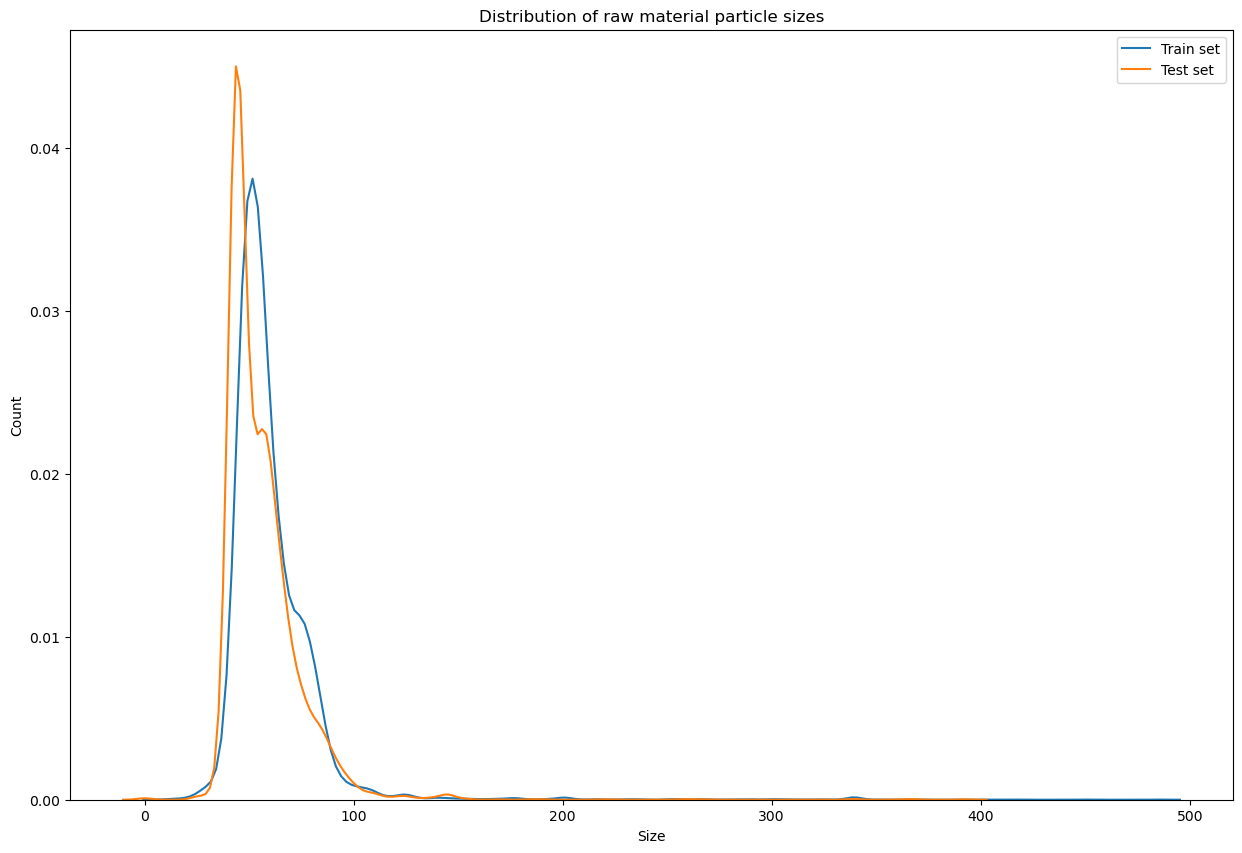

In [30]:
#Looking at the distribution of raw material particle sizes in the training and test sets
plt.figure(figsize=(15, 10))
sns.kdeplot(x=train_set['rougher.input.feed_size'], label='Train set')
sns.kdeplot(x=test_set['rougher.input.feed_size'] , label='Test set')
plt.title('Distribution of raw material particle sizes')
plt.legend()
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

After studying the concentration of metals at different stages of purification, the following conclusions can be drawn:

 - The concentration of lead and gold gradually increases towards the end of the concentrate purification process
 - At the same time, the concentration of silver decreases towards the end of purification
 - It has also become clear that the concentration of all metals increases as the final concentrate is obtained

In conclusion, it was shown that the distribution of raw material particle sizes in the training and test sets is approximately the same, so there should be no issues with prediction.

## Model training

In [31]:
#Creating a function to calculate sMAPE (symmetric mean absolute percentage error)

def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

In [32]:
#Calculating the final sMAPE

def end_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

In [33]:
#Deleting from training set features that are missing from test set
train_set.drop(list(set(train_set) - set(test_set)), axis=1, inplace=True)

In [34]:
def feature_target_rougher(data):
    data_cols = pd.Series(data.columns)
    features_1_col = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1 = data[features_1_col]
    
    scaler_1 = StandardScaler()
    features_1 = scaler_1.fit_transform(features_1)
    target_1 = data['rougher.output.recovery']
    
    return features_1, target_1, scaler_1

def feature_target_final(data):
    features_2 = data.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
    
    scaler_2 = StandardScaler()
    features_2 = scaler_2.fit_transform(features_2)
    target_2 = data['final.output.recovery']
    
    return features_2, target_2, scaler_2

In [35]:
features_1, target_1, scaler_1 = feature_target_rougher(train_set)
features_2, target_2, scaler_2 = feature_target_final(train_set)

In [36]:
def get_cv_scores(model, target, features):
    my_scorer = make_scorer(smape, greater_is_better=False)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

### Decision tree

In [37]:
d = defaultdict(list)

param_grid = {'max_depth': range(1, 14),
              'min_samples_leaf': [1, 2, 4, 8]}

model_1 = DecisionTreeRegressor(random_state=12345)
model_2 = DecisionTreeRegressor(random_state=12345)

sMAPE_scorer = make_scorer(smape, greater_is_better=False)

model_1_grid = GridSearchCV(model_1, param_grid, scoring=sMAPE_scorer)
model_2_grid = GridSearchCV(model_2, param_grid, scoring=sMAPE_scorer)

model_1_grid.fit(features_1, target_1)
model_2_grid.fit(features_2, target_2)

for depth in range(1, 14):
    for min_samples_leaf in [1, 2, 4, 8]:
        d['depth'].append(depth)
        d['min_samples_leaf'].append(min_samples_leaf)

        model_1.set_params(max_depth=depth, min_samples_leaf=min_samples_leaf)
        model_2.set_params(max_depth=depth, min_samples_leaf=min_samples_leaf)

        d['rougher_smape'].append(get_cv_scores(model_1, target_1, features_1))
        d['final_smape'].append(get_cv_scores(model_2, target_2, features_2))

        d['end_smape'].append(end_smape(d['rougher_smape'][-1], d['final_smape'][-1]))

pd.DataFrame(d).sort_values(by='end_smape')

,depth,min_samples_leaf,rougher_smape,final_smape,end_smape
48,13,1,-8.542669,-14.009281,-12.642628
50,13,4,-8.439934,-13.920660,-12.550478
49,13,2,-8.506074,-13.733402,-12.426570
46,12,4,-8.339856,-13.509892,-12.217383
44,12,1,-8.949508,-13.144380,-12.095662
45,12,2,-8.645135,-13.208643,-12.067766
40,11,1,-8.272399,-13.323187,-12.060490
41,11,2,-8.442087,-13.017364,-11.873545
42,11,4,-8.020244,-13.033164,-11.779934
51,13,8,-7.919807,-12.974489,-11.710819


### Random Forest

In [38]:
from collections import defaultdict
random_forest = defaultdict(list)
for depth in range(1, 20):
    
    model_1 = RandomForestRegressor(max_depth=depth, n_estimators=10, random_state=12345)
    model_2 = RandomForestRegressor(max_depth=depth, n_estimators=10, random_state=12345)
    
    rougher_smape = get_cv_scores(model_1, target_1, features_1)
    final_smape = get_cv_scores(model_2, target_2, features_2)
    
    random_forest['rougher_smape'].append(rougher_smape)
    random_forest['final_smape'].append(final_smape)
    random_forest['end_smape'].append(end_smape(rougher_smape, final_smape))
    random_forest['max_depth'].append(depth)

pd.DataFrame(random_forest).sort_values(by='end_smape')

,rougher_smape,final_smape,end_smape,max_depth
17,-7.041076,-10.575442,-9.691851,18
18,-6.947436,-10.593434,-9.681934,19
16,-7.123745,-10.480491,-9.641305,17
15,-6.986528,-10.479581,-9.606318,16
12,-7.061764,-10.406371,-9.570220,13
14,-6.942209,-10.443991,-9.568545,15
13,-7.116054,-10.335259,-9.530458,14
10,-6.999389,-10.298402,-9.473649,11
11,-6.816057,-10.356037,-9.471042,12
9,-6.966120,-10.137365,-9.344553,10


### Linear Regression

In [39]:
model_1 = LinearRegression()
model_2 = LinearRegression()

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

data_lr_temp = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
data_lr_temp

rougher_smape    -6.673496
final_smape     -10.947562
end_smape        -9.879045
dtype: float64

In the end, the best models yielded the following results:

 - Decision Tree: final sMAPE 8.83 with depth 3 and min_samples_leaf 1
 - Random Forest: 8.4 with 4 estimators
 - Linear Regression: 9.87
 
Therefore, for the final evaluation, we will use the Random Forest model.

In [40]:
def feature_target_rougher_test(data, scaler_1):
    data_cols = pd.Series(test_set.columns)
    features_1_col_test = list(data_cols[data_cols.str.contains('rougher.input|rougher.state')])
    features_1_test = data[features_1_col_test]
    
    features_1_test = scaler_1.transform(features_1_test) 
    target_1_test = data['rougher.output.recovery']
    
    return features_1_test, target_1_test, scaler_1

In [41]:
def feature_target_final_test(data, scaler_2):
    features_2_test = test_set.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
    
    features_2_test = scaler_2.transform(features_2_test) 
    target_2_test = test_set['final.output.recovery']
    
    return features_2_test, target_2_test, scaler_2

In [42]:
features_1_test, target_1_test, scaler_1 = feature_target_rougher_test(test_set, scaler_1)
features_2_test, target_2_test, scaler_2 = feature_target_final_test(test_set, scaler_2)

## Testing the final model

In [43]:
from collections import defaultdict
test_dict = defaultdict(list)

model_1 = RandomForestRegressor(max_depth=4, n_estimators=10, random_state=12345)
model_2 =  RandomForestRegressor(max_depth=4, n_estimators=10, random_state=12345)

model_1.fit(features_1, target_1)
model_2.fit(features_2, target_2)

train_predictions_1 = model_1.predict(features_1_test)
train_predictions_2 = model_2.predict(features_2_test)

 
test_dict['rougher_smape'].append(smape(target_1_test, train_predictions_1))
test_dict['final_smape'].append(smape(target_2_test, train_predictions_2))
test_dict['end_smape'].append(end_smape(smape(target_1_test, train_predictions_1), smape(target_2_test, train_predictions_2)))

pd.DataFrame(test_dict)

,rougher_smape,final_smape,end_smape
0,8.398216,9.765488,9.42367


The final model achieved an overall sMAPE result of 9.42 on the test dataset.

Now let's check the model for adequacy by comparing it to a dummy model.

In [44]:
features_1, target_1, scaler_1 = feature_target_rougher(train_set)
features_2, target_2, scaler_2 = feature_target_final(train_set)

model_1 = DummyRegressor(strategy="mean")
model_2 = DummyRegressor(strategy="mean")

rougher_smape = get_cv_scores(model_1, target_1, features_1)
final_smape = get_cv_scores(model_2, target_2, features_2)
end_smape_ = end_smape(rougher_smape, final_smape)

dummy_model = pd.Series({'rougher_smape': rougher_smape,
                           'final_smape': final_smape,
                           'end_smape': end_smape_}) 
dummy_model

rougher_smape    -7.802276
final_smape     -10.403313
end_smape        -9.753054
dtype: float64

The dummy model showed a worse result than the final model (9.75 vs. 9.42), so it can be concluded that the final model has passed the adequacy test.

## Conclusion

The goal of the project was to create a model that predicts the efficiency of rougher and final concentrate enrichment.

In the first stage, it was shown that the provided efficiency of enrichment in the datasets was calculated correctly.

Then it was demonstrated that in the data, the concentration of gold and lead increases as the process progresses, while the concentration of silver shows the opposite trend. Attention was also drawn to the fact that the distributions of feed particle sizes differ between the training and test datasets.

In the end, three models (decision tree, random forest, and linear regression) were created and evaluated using cross-validation. The decision tree model performed the best with an sMAPE of 5.95 at max_depth 3. It was then tested and achieved a result of 9.66, passing the adequacy check against a dummy model.